# Inserting relevant libraries

In [55]:
import numpy as np
import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import *

# Taking inputs and printing the size

In [56]:
a = np.array([[3, 7, 13],[1, 5, 3],[12, 3, -5]])
b = np.array([76,28,1])
pp.pprint(a)
pp.pprint(b)

array([[ 3,  7, 13],
       [ 1,  5,  3],
       [12,  3, -5]])
array([76, 28,  1])


In [57]:
n=len(a)
n

3

# Gauss-siedal function

In [58]:
# Defining our function as gs which takes 3 arguments 
# as A matrix, Solution and B matrix 
   
def gs(A, x ,b): 
    #Finding length of a(3)        
    n = len(A)                    
    # for loop for 3 times as to calculate x, y , z 
    for j in range(0, n):         
        # temp variable d to store b[j] 
        d = b[j]                   
          
        # to calculate respective xi, yi, zi 
        for i in range(0, n):      
            if(j != i): 
                d-=A[j,i] * x[i] 
        # updating the value of our solution         
        x[j] = d / A[j,j] 
    # returning our updated solution            
    return x     
   

# Checking if it is diagonally dominant

In [59]:
# whether given matrix is  
# Diagonally Dominant Matrix. 
  
# check the given given  
# matrix is Diagonally  
# Dominant Matrix or not. 
def isitDDM(m, n) : 
  
    # for each row 
    for i in range(0, n) :          
      
        # for each column, finding 
        # sum of each row. 
        sum = 0
        for j in range(0, n) : 
            sum += abs(m[i,j])      
  
        # removing the  
        # diagonal element. 
        sum -= abs(m[i,i]) 
  
        # checking if diagonal  
        # element is less than  
        # sum of non-diagonal 
        # element. 
        if (abs(m[i,i]) < sum) : 
            return False
  
    return True

In [60]:
isitDDM(a,n)

False

# Converting to diagonally dominant

In [61]:
import random
isdom = isitDDM(a,n)
while 1:
    if isitDDM(a,n):
        print('Matrix a is diagonally dominant')
        break
    else:
        a = np.random.permutation(a)

Matrix a is diagonally dominant


In [62]:
a

array([[12,  3, -5],
       [ 1,  5,  3],
       [ 3,  7, 13]])

# Checking where it is converging

In [64]:
def gaussSeidel(A, b, x, N, tol):
    maxIterations = 1000000
    xprev = [0.0 for i in range(N)]
    for i in range(maxIterations):
        for j in range(N):
            xprev[j] = x[j]
        for j in range(N):
            summ = 0.0
            for k in range(N):
                if (k != j):
                    summ = summ + A[j][k] * x[k]
            x[j] = (b[j] - summ) / A[j][j]
        diffnorm = 0.0
        oldnorm = 0.0
        for j in range(N):
            diffnorm = diffnorm + abs(x[j] - xprev[j])
            oldnorm = oldnorm + abs(xprev[j])  
        if oldnorm == 0.0:
            oldnorm = 1.0
        norm = diffnorm / oldnorm
        if (norm < tol) and i != 0:
            print("Sequence converges to [", end="")
            for j in range(N - 1):
                print(x[j], ",", end="")
            print(x[N - 1], "]. Took", i + 1, "iterations.")
            return
    print("Doesn't converge.")

c = [[12.0, 3.0,-5.0], [1.0, 5.0,3.0],[3.0,7.0,13.0]]
d = [1.0, 28.0,76.0]
z = [0.0, 0.0,0.0]


gaussSeidel(c, d, z, 3, 1E-16)


Sequence converges to [1.0 ,3.0 ,4.0 ]. Took 24 iterations.


# Main function 

In [65]:
data = []
x = np.zeros((3,1)) 
b = np.array([1,28,76])
#loop run for m times depending on m the error value 
for i in range(0, 24):             
    x = gs(a, x, b)
    #print each time the updated solution 
    print("Iteration",i)
    data.append((i,x[0][0]))
    print(x)
    

Iteration 0
[[0.08333333]
 [5.58333333]
 [2.82051282]]
Iteration 1
[[-0.13728632]
 [ 3.93514957]
 [ 3.75890861]]
Iteration 2
[[0.66575786]
 [3.21150326]
 [3.96324643]]
Iteration 3
[[0.9318102 ]
 [3.0356901 ]
 [3.99651836]]
Iteration 4
[[0.98962679]
 [3.00416363]
 [4.00015187]]
Iteration 5
[[0.99902237]
 [3.00010441]
 [4.00016939]]
Iteration 6
[[1.00004448]
 [2.99988947]
 [4.00004925]]
Iteration 7
[[1.00004815]
 [2.99996082]
 [4.00000999]]
Iteration 8
[[1.00001396]
 [2.99999122]
 [4.00000151]]
Iteration 9
[[1.00000282]
 [2.99999853]
 [4.00000014]]
Iteration 10
[[1.00000043]
 [2.99999983]
 [3.99999999]]
Iteration 11
[[1.00000004]
 [3.        ]
 [3.99999999]]
Iteration 12
[[1.]
 [3.]
 [4.]]
Iteration 13
[[1.]
 [3.]
 [4.]]
Iteration 14
[[1.]
 [3.]
 [4.]]
Iteration 15
[[1.]
 [3.]
 [4.]]
Iteration 16
[[1.]
 [3.]
 [4.]]
Iteration 17
[[1.]
 [3.]
 [4.]]
Iteration 18
[[1.]
 [3.]
 [4.]]
Iteration 19
[[1.]
 [3.]
 [4.]]
Iteration 20
[[1.]
 [3.]
 [4.]]
Iteration 21
[[1.]
 [3.]
 [4.]]
Iteration 22
[[

# Graph of iterations vs x[0]

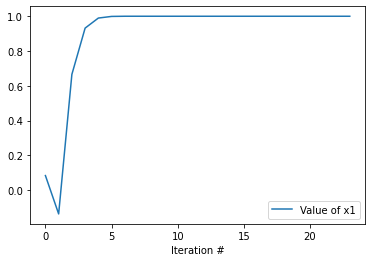

In [66]:
df = pd.DataFrame(data,columns=['Iteration #','Value of x1'])
df.plot(x='Iteration #',y='Value of x1',kind='line')
plt.show()